In [87]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_dir = 'kaggle-survey-2018/'

In [3]:
free_form = pd.read_csv(data_dir + 'freeFormResponses.csv')
multiple_choice = pd.read_csv(data_dir + 'multipleChoiceResponses.csv')
survey_schema = pd.read_csv(data_dir + 'SurveySchema.csv')

C:\Users\victors\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\victors\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
multiple_choice.shape

(23860, 395)

In [5]:
free_form.shape

(23860, 35)

In [6]:
multiple_q = multiple_choice.loc[0, :]
multiple_a = multiple_choice.loc[1:, :]

In [7]:
multiple_a.groupby(by='Q1')['Q1'].count()

Q1
Female                      4010
Male                       19430
Prefer not to say            340
Prefer to self-describe       79
Name: Q1, dtype: int64

In [8]:
sqldf("""select * from survey_schema""").head()

,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
questions = survey_schema.loc[0, :]

In [9]:
questions.to_csv('questions.csv')

In [10]:
multiple_choice = multiple_choice.loc[1:,:].copy()

In [11]:
multiple_choice.loc[multiple_choice['Q1']=='Male',['Q9']]

,Q9
2,"10-20,000"
4,NaN
5,"0-10,000"
6,I do not wish to disclose my approximate yearl...
7,"10-20,000"
8,"0-10,000"
9,NaN
10,"20-30,000"
11,I do not wish to disclose my approximate yearl...
12,"125-150,000"


In [167]:
sqldf("""select Q1, Q9, count(*) from multiple_choice group by 1, 2 order by count(*) desc""").head()

,Q1,Q9,count(*)
0,Male,I do not wish to disclose my approximate yearl...,3759
1,Male,"0-10,000",3610
2,Male,None,2805
3,Male,"10-20,000",1616
4,Male,"20-30,000",1181


In [168]:
sqldf("""select Q9, count(*) from multiple_choice group by 1 order by count(*) desc""")

,Q9,count(*)
0,I do not wish to disclose my approximate yearl...,4756
1,"0-10,000",4398
2,None,3674
3,"10-20,000",1937
4,"20-30,000",1395
5,"30-40,000",1119
6,"40-50,000",965
7,"50-60,000",919
8,"100-125,000",843
9,"60-70,000",729


In [169]:
sqldf("""select Q9, count(*) from multiple_choice where Q1 = 'Male' and Q3 = 'United States of America' group by 1 order by count(*) desc""")

,Q9,count(*)
0,I do not wish to disclose my approximate yearl...,532
1,"100-125,000",403
2,None,396
3,"150-200,000",289
4,"125-150,000",283
5,"0-10,000",232
6,"90-100,000",199
7,"70-80,000",195
8,"80-90,000",161
9,"60-70,000",146


In [170]:
sqldf("""select Q9, count(*) from multiple_choice where Q1 = 'Female' and Q3 = 'United States of America' group by 1 order by count(*) desc""")

,Q9,count(*)
0,I do not wish to disclose my approximate yearl...,198
1,None,150
2,"100-125,000",97
3,"0-10,000",96
4,"125-150,000",78
5,"80-90,000",68
6,"70-80,000",55
7,"90-100,000",54
8,"60-70,000",50
9,"50-60,000",45


In [171]:
sqldf("""select Q3, count(*) from multiple_choice group by 1 order by count(*) desc""")

,Q3,count(*)
0,United States of America,4716
1,India,4417
2,China,1644
3,Other,1036
4,Russia,879
5,Brazil,736
6,Germany,734
7,United Kingdom of Great Britain and Northern I...,702
8,Canada,604
9,France,604


In [12]:
def convert_salary(salary):

    if salary == '500,000+':
        return 500000
    else:
        try:
            a, b = salary.replace(',','').split('-')
            avg = (int(a)*1000+int(b))/2
            return avg
        except:
            return None

In [13]:
def convert_xp(xp, return_type):
    if xp == '30 +':
        xp = 30
    elif xp == '40+ years':
        xp = 40
    elif xp == '< 1 year':
        xp = 0.5
    else:
        try:
            a, b = xp.replace(' years', '').split('-')
            xp = (int(a)+int(b))/2
        except:
            return None
        
    if return_type == 'years':
        return xp
    elif return_type == 'seniority level':
        if xp < 3:
            return 0
        elif xp < 6:
            return 1
        else:
            return 2
    else:
        return None   

In [30]:
def convert_age(age):
    if age == '80+':
        return 80
    else:
        try:
            a, b = age.split('-')
            return (int(a)+int(b))/2
        except:
            return None

In [66]:
df = pd.DataFrame()

In [67]:
df['gender'] = multiple_choice.Q1
df['current_role_xp'] = multiple_choice.Q8.apply(convert_xp, args = ('years',))
df['coding_xp'] = multiple_choice.Q24.apply(convert_xp, args = ('years',))
df['ml_xp'] = multiple_choice.Q25.apply(convert_xp, args = ('years',))
df['current_role_xp_level'] = multiple_choice.Q8.apply(convert_xp, args = ('seniority level',))
df['coding_xp_level'] = multiple_choice.Q24.apply(convert_xp, args = ('seniority level',))
df['ml_xp_level'] = multiple_choice.Q25.apply(convert_xp, args = ('seniority level',))
df['income'] = multiple_choice.Q9.apply(convert_salary)
df['geography'] = multiple_choice.Q3
df['original_age'] = multiple_choice.Q2
df['age'] = multiple_choice.Q2.apply(convert_age)

In [68]:
df = df[df.gender.isin(['Male', 'Female'])]

In [69]:
df.describe()

,current_role_xp,coding_xp,ml_xp,current_role_xp_level,coding_xp_level,ml_xp_level,income,age
count,20774.000000,17408.000000,16174.000000,20774.000000,17408.000000,16174.000000,15246.000000,23440.000000
mean,4.716015,4.128447,2.050575,0.686098,0.648093,0.262273,50166.765053,30.044902
std,5.923546,5.678370,2.242269,0.864977,0.805358,0.580684,60645.859589,9.562358
min,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,5000.000000,19.500000
25%,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,5000.000000,23.000000
50%,2.500000,1.500000,1.500000,0.000000,0.000000,0.000000,25000.000000,27.000000
75%,7.500000,4.000000,2.500000,2.000000,1.000000,0.000000,75000.000000,32.000000
max,30.000000,40.000000,12.500000,2.000000,2.000000,2.000000,500000.000000,80.000000


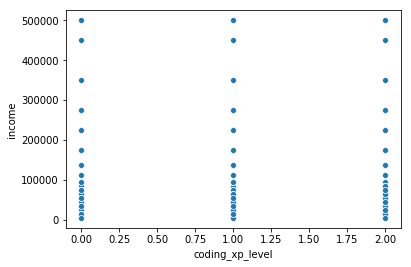

In [20]:
sns.scatterplot(x='coding_xp_level', y='income', data=df)
plt.show()

In [28]:
sqldf("""select ml_xp, avg(income) from df where gender = 'Female' group by 1 order by 1""")

,ml_xp,avg(income)
0,NaN,39738.924051
1,0.5,34031.664212
2,1.5,41659.959759
3,2.5,56633.858268
4,3.5,58611.111111
5,4.5,83279.220779
6,7.5,74650.537634
7,12.5,87016.129032


In [19]:
sqldf("""select ml_xp, avg(income) from df where gender = 'Male' group by 1 order by 1""")

,ml_xp,avg(income)
0,NaN,44545.869883
1,0.5,34551.724138
2,1.5,46260.669731
3,2.5,63465.132998
4,3.5,68557.449495
5,4.5,80261.989343
6,7.5,100461.658842
7,12.5,107910.958904


In [23]:
sqldf("""select count(distinct geography) from df""")

,count(distinct geography)
0,58


In [27]:
sqldf("""select geography
    , count(*)
    , sum(case when gender = 'Male' then 1 else 0 end) as count_male
    , sum(case when gender = 'Female' then 1 else 0 end) as count_female
    from df 
    group by 1 
    order by count(*) desc""")

,geography,count(*),count_male,count_female
0,United States of America,4716,3530,1082
1,India,4417,3719,657
2,China,1644,1337,267
3,Other,1036,849,165
4,Russia,879,750,113
5,Brazil,736,666,65
6,Germany,734,621,103
7,United Kingdom of Great Britain and Northern I...,702,554,131
8,Canada,604,475,123
9,France,604,494,104


In [ ]:
# visualize junior, senior, staff salary gap for 3 dimensions: current role, ml, coding maybe just coding vs ml
# top gap by country (50+ people)
# $ avg by age

In [46]:
inc_by_age_gender = sqldf("""select gender, age, avg(income) as avg_income from df where gender in ('Male', 'Female') group by 1, 2 having count(*) > 50 order by 1, 2""")

In [47]:
inc_by_age_gender

,gender,age,avg_income
0,Female,19.5,11370.967742
1,Female,23.0,25437.616387
2,Female,27.0,43937.841530
3,Female,32.0,55706.775701
4,Female,37.0,64350.649351
5,Female,42.0,61016.949153
6,Female,47.0,64479.166667
7,Female,52.0,92443.181818
8,Male,19.5,13100.343053
9,Male,23.0,22811.563169


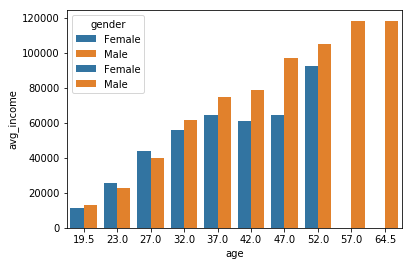

In [43]:
sns.barplot(x = 'age', y = 'avg_income', hue = 'gender', data = inc_by_age_gender)
plt.show()

In [53]:
sqldf("""
with bd as (
    select gender, age, avg(income) as avg_income, count(*) as population
    from df
    where gender in ('Male', 'Female')
    group by 1, 2
)
select *
from (select * from bd where gender = 'Male' and population >= 50) as male
join (select * from bd where gender = 'Female' and population >= 50) as female
    on male.age = female.age


""").head()

,gender,age,avg_income,population,gender,age,avg_income,population
0,Male,19.5,13100.343053,2509,Female,19.5,11370.967742,491
1,Male,23.0,22811.563169,4046,Female,23.0,25437.616387,1024
2,Male,27.0,40042.154901,4955,Female,27.0,43937.841530,1115
3,Male,32.0,61578.331205,3081,Female,32.0,55706.775701,622
4,Male,37.0,74643.628510,1855,Female,37.0,64350.649351,353


In [94]:
df_plot = df.groupby(by=['gender','age']).agg({'income':['mean', 'median', 'count']})

In [80]:
df_plot.columns

MultiIndex(levels=[['income'], ['mean', 'median', 'count']],
           labels=[[0, 0, 0], [0, 1, 2]])

In [109]:
df_plot[(df_plot['income']['count'] >= 50)]

income                
                      mean    median count
gender age                                
Female 19.5   11370.967742    5000.0   186
       23.0   25437.616387    5000.0   537
       27.0   43937.841530   35000.0   732
       32.0   55706.775701   45000.0   428
       37.0   64350.649351   55000.0   231
       42.0   61016.949153   45000.0   118
       47.0   64479.166667   45000.0    72
Male   19.5   13100.343053    5000.0  1166
       23.0   22811.563169    5000.0  2335
       27.0   40042.154901   25000.0  3499
       32.0   61578.331205   45000.0  2349
       37.0   74643.628510   55000.0  1389
       42.0   79020.348837   65000.0   860
       47.0   97068.138196   75000.0   521
       52.0  105269.121813   85000.0   353
       57.0  118471.502591  112500.0   193
       64.5  118066.860465  112500.0   172

In [119]:
df_plot.columns = df_plot.columns.droplevel(level=0)

In [122]:
df_plot.rename(columns={"mean": "min_duration", "median": "max_duration", "count": "mean_duration"})

min_duration  max_duration  mean_duration
gender age                                             
Female 19.5   11370.967742        5000.0            186
       23.0   25437.616387        5000.0            537
       27.0   43937.841530       35000.0            732
       32.0   55706.775701       45000.0            428
       37.0   64350.649351       55000.0            231
       42.0   61016.949153       45000.0            118
       47.0   64479.166667       45000.0             72
       52.0   92443.181818       80000.0             44
       57.0  122916.666667      112500.0             24
       64.5   97500.000000       85000.0              7
       74.5   35000.000000       35000.0              1
       80.0            NaN           NaN              0
Male   19.5   13100.343053        5000.0           1166
       23.0   22811.563169        5000.0           2335
       27.0   40042.154901       25000.0           3499
       32.0   61578.331205       45000.0           2349
       37.0   74643.628510       55000.0           1389
       42.0   79020.348837       65000.0            860
       47.0   97068.138196       75000.0            521
       52.0  105269.121813       85000.0            353
       57.0  118471.502591      112500.0            193
       64.5  118066.860465      112500.0            172
       74.5  102500.000000       65000.0             25
       80.0   55000.000000       55000.0              4